In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class ConvNorm(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, padding, dropout, skip_connection=False):
        super(ConvNorm, self).__init__()
        self.skip_connection = skip_connection 
        self.conv = nn.Conv3d(in_channels, out_channels, kernel_size=kernel_size, stride=stride, padding=padding)
        self.batch_norm = nn.BatchNorm3d(out_channels)
        self.dropout = dropout
  
    def forward(self, x):
        identity = x

        out = self.conv(x)
        out = self.batch_norm(out)

        if self.skip_connection:
            out += identity

        out = F.relu(out)

        out = F.dropout(out, self.dropout)

        return out

In [6]:
x = torch.randn(1, 3, 50, 96, 96)

In [7]:
x.shape

torch.Size([1, 3, 50, 96, 96])

In [38]:
x = torch.randn(1, 3, 50, 96, 96)

convs = nn.Sequential(
    ConvNorm(3, 6, 5, (1,2,2), (2,1,1), 0.1),
    ConvNorm(6, 6, 3, (1,1,1), (1,1,1), 0.1, skip_connection=True),
    ConvNorm(6, 6, 3, (1,1,1), (1,1,1), 0.1, skip_connection=True),

    ConvNorm(6, 12, 3, (1,2,2), (1,0,0), 0.1),
    ConvNorm(12, 12, 3, (1,1,1), (1,1,1), 0.1, skip_connection=True),
    ConvNorm(12, 12, 3, (1,1,1), (1,1,1), 0.1, skip_connection=True),

    ConvNorm(12, 24, 3, (1,2,2), (1,0,0), 0.1),
    ConvNorm(24, 24, 3, (1,1,1), (1,1,1), 0.1, skip_connection=True),
    ConvNorm(24, 24, 3, (1,1,1), (1,1,1), 0.1, skip_connection=True),

    ConvNorm(24, 48, 3, (1,2,2), (1,0,0), 0.1),

    ConvNorm(48, 48, 5, (1,3,3), (2,1,1), 0.1),
)

x = convs(x)

print(x.shape)

torch.Size([1, 48, 50, 1, 1])


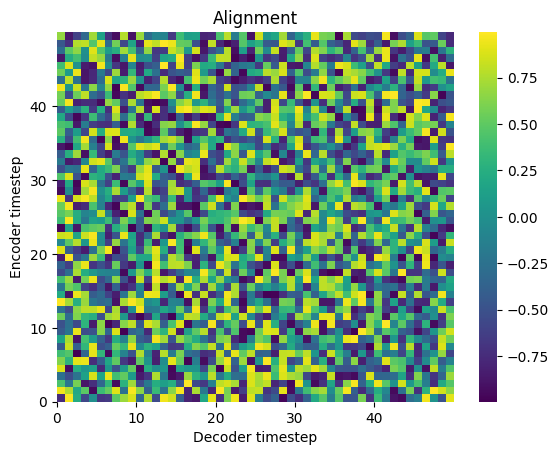

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

rng = np.arange(0, 50, 10)

m = np.tanh(np.random.randn(50, 50))
s = sns.heatmap(m, xticklabels=False, yticklabels=False, cmap='viridis', annot=False)
s.set_xticks(rng)
s.set_yticks(rng)
s.set_xticklabels(rng)
s.set_yticklabels(rng)
plt.title('Alignment')
plt.xlabel('Decoder timestep')
plt.ylabel('Encoder timestep')
plt.ylim(0, 50)
plt.xlim(0, 50)

plt.show()

In [41]:
mm = []
for _ in range(10):
    mm.append(np.tanh(np.random.randn(50, 50)))
mm = np.array(mm)
mm.shape

(10, 50, 50)

In [42]:
np.mean(mm, axis=0).shape

(50, 50)